## Logistic Regression Model

In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [137]:
data = pd.read_csv("/content/drive/MyDrive/projects/textclassification/train.csv")  ## path
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [138]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [139]:
data.shape 

(159571, 8)

In [140]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [141]:
print(data["comment_text"].isna().sum())

0


In [142]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
unlabelled_in_all = data[(data['toxic']!=1) & (data['severe_toxic']!=1) &
                             (data['obscene']!=1) & (data['threat']!=1) &
                             (data['insult']!=1) & (data['identity_hate']!=1)]
print('Percentage of unlabelled comments or good comments is ', len(unlabelled_in_all)/len(data)*100)

Percentage of unlabelled comments or good comments is  89.83211235124176


In [144]:
labelled_in_all = data[(data['toxic']==1) & (data['severe_toxic']==1) &
                             (data['obscene']==1) & (data['threat']==1) &
                             (data['insult']==1) & (data['identity_hate']==1)]
print('Percentage of comments which is present in all categories is ', len(labelled_in_all)/len(data)*100)

Percentage of comments which is present in all categories is  0.019427088882065038


In [145]:
print('Total rows in train is {}'.format(len(data)))
print(data[cols_target].sum())

Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


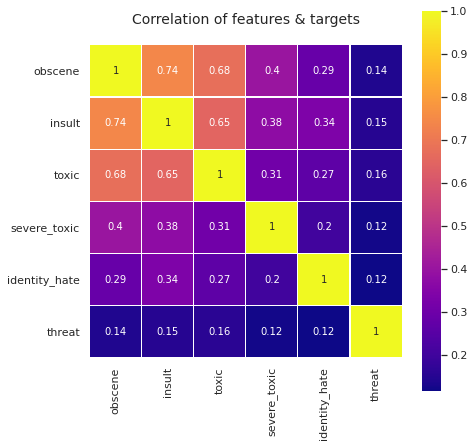

In [146]:
target_data = data[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(target_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

plt.show()

In [147]:
data['block'] =data[cols_target].sum(axis =1)
print(data['block'].value_counts())
data['block'] = data['block'] > 0 
data['block'] = data['block'].astype(int)
print(data['block'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: block, dtype: int64
0    143346
1     16225
Name: block, dtype: int64


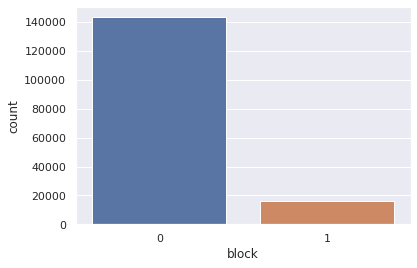

In [148]:
sns.set()
sns.countplot(x="block" , data = data )
plt.show()

In [149]:
data['char_length'] = data['comment_text'].apply(lambda x: len(str(x)))

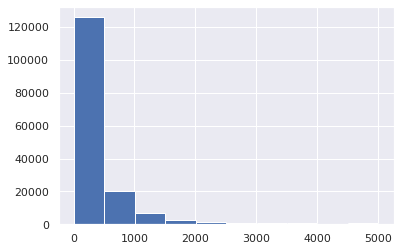

In [150]:
sns.set()
data['char_length'].hist()
plt.show()

## Text Cleaning

In [151]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [152]:
%%time 

data['comment_text'] = data['comment_text'].map(lambda com : clean_text(com))


CPU times: user 8.97 s, sys: 15.4 ms, total: 8.98 s
Wall time: 9.05 s


In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], data['block'], test_size=0.2, random_state=42)

In [154]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(127656,) (31915,)
(127656,) (31915,)


In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
#vect = TfidfVectorizer(stop_words='english')
print(vect)
pickle.dump(vect, open("vectorizer.pickle", "wb"))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [156]:
vect = pickle.load(open("vectorizer.pickle", 'rb'))

In [157]:
%%time 

X_train_dtm = vect.fit_transform(X_train)

X_train_dtm

CPU times: user 6.55 s, sys: 188 ms, total: 6.74 s
Wall time: 6.76 s


In [158]:
X_train_dtm.shape

(127656, 10000)

In [159]:
%%time
X_test_dtm = vect.transform(X_test)

X_test_dtm

CPU times: user 1.53 s, sys: 1.5 ms, total: 1.53 s
Wall time: 1.55 s


In [160]:
X_test_dtm.shape

(31915, 10000)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1, max_iter = 2000)
import pickle



# train the model using X_train_dtm & y_train
logreg.fit(X_train_dtm, y_train)
filename = "lr_model.pkl"
pickle.dump(logreg, open(filename, 'wb'))
# compute the training accuracy
y_pred_train = logreg.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
# compute the predicted probabilities for X_test_dtm
y_pred_test = logreg.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

Training accuracy is 0.9594613649182178
Test accuracy is 0.9563214789284036
[[28507   164]
 [ 1230  2014]]


In [162]:
#!pwd
#cd /content/drive/MyDrive/projects/textclassification

## Testing model for custom inputs

In [163]:
model = pickle.load(open("lr_model", 'rb'))

In [164]:
sen = [" FCUK"]

In [165]:
sen_trans = vect.transform(sen)
print(sen_trans.shape)

(1, 10000)


In [166]:
print(sen)
print(sen_trans)

[' FCUK']



In [167]:
p = model.predict(sen_trans)

In [168]:
print(p)

[0]


In [172]:
sen = [""]
sen_trans = vect.transform(sen)
p = model.predict(sen_trans)[0]
validity = ["allowed","toxic"]
print(validity[p])


toxic


In [1]:
import pandas as pd


In [3]:
file = pd.read_csv("./dataset/bad-words.csv")

In [4]:
file

,jigaboo
0,mound of venus
1,asslover
2,s&m
3,queaf
4,whitetrash


In [11]:
badwords = file["jigaboo"].values.tolist()

In [13]:
import pickle

In [14]:
badwordset = set(badwords)

In [17]:
pickle.dump(badwordset,open("bwset.pkl","wb"))

In [18]:
bwset = pickle.load(open("bwset.pkl","rb"))

In [35]:
def ifbadword(string):#return true if string contains any bad word
    for i in string.split():
        if i in bwset:
            return True
    return False

In [48]:
y = ifbadword("Ice trooper")

In [49]:
y

False